<a href="https://colab.research.google.com/github/Demosthene-OR/Student-AI-and-Data-Management/blob/main/sklearn_classif_01_logistic_reg_en.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="https://prof.totalenergies.com/wp-content/uploads/2024/09/TotalEnergies_TPA_picto_DegradeRouge_RVB-1024x1024.png" height="150" width="150">
<hr style="border-width:2px;border-color:#75DFC1">
<h1 style = "text-align:center" >Scikit-Learn: classification models</h1>
<h2 style = "text-align:center">Classification using logistic regression</h2>
<hr style="border-width:2px;border-color:#75DFC1">


>In this exercise, we will study an example of using logistics regression under Python.<br>
> The packages used will be **pandas**, **scikit-learn** and its sub-packages notably **Linear_model**, **Metrics**, **Preprocessing** and **Model_selection**.
>
>This exercise relates to the parameters that can influence the admission of a high school candidate.<br>
> The data we are going to process contain four variables:
>> * `admit`: binary variable, which indicates whether a candidate is admitted (admitted = 1) or not (admitted = 0).
>>
>>
>> * `gre` (Graduate Record Examination): A test in English created and managed by the ETS company.
>>
>>
>> * `gpa` (Grade Point Average): the average of the notes of a student.
>>
>>
>> * `prestige`: Prestige of the candidate, 1 being the best score and 4 weakest.
>
> The exercise is made up of several questions. You are invited to do them in order and be careful to respect the names of the variables.

<hr style="border-width:2px;border-color:#75DFC1">
<h3 style = "text-align:center">1. Data preparation and modeling</h3>
<hr style="border-width:2px;border-color:#75DFC1">

* **(a)** Import the sub-models **`Linear_model`** and **` Preprocessing`** from the library **`Sklearn`**.


* **(b)** Import the function **`Train_test_Split`** from the submodule **` sklearn.model_selection`**.


* **(c)** Import libraries **`Pandas`** and **` Numpy`** under the alias **`Pd`** and **` NP`**.


* **(d)** Read the file **`'admissions.csv'`** in a dataframe named **`Df`**.


* **(e)** Show the first lines of `DF` to verify that the import has been going well.

<div class="alert alert-info">
<i class="fa fa-info-circle"></i> &emsp;
Remember that before looking at the solution, you can always access the official Python help by typing <code style = "background-color: transparent ; color : inherit"><b>help(name_function)</b></code> in the console.
</div>



In [ ]:
# Import of the necessary libraries
from sklearn import linear_model
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

# Reading the "Admissions.csv" file
url = "https://raw.githubusercontent.com/Demosthene-OR/Student-AI-and-Data-Management/main/"
df = pd.read_csv(url+'admissions.csv')

# Display of the first lines
df.head()


,admit,gre,gpa,prestige
0,0,380.0,3.61,3.0
1,1,660.0,3.67,3.0
2,1,800.0,4.00,1.0
3,1,640.0,3.19,4.0
4,0,520.0,2.93,4.0



> In the real world, the data contains anomalies or missing values ​​that compromise the quality of the dataset.

* **(f)** Show information from*DataFrame* **`df`**.

<div class="alert alert-info">
<i class="fa fa-info-circle"></i> &emsp;
Rappel : La méthode <code style="background-color:transparent; color:inherit">info</code> résume les informations du DataFrame. Elle retourne les types de valeurs du DataFrame, le nombre de lignes et de colonnes, le nombre des valeurs non nulles, etc.
</div>



In [ ]:
# Display of data information
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525 entries, 0 to 524
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   admit     525 non-null    int64  
 1   gre       523 non-null    float64
 2   gpa       523 non-null    float64
 3   prestige  524 non-null    float64
dtypes: float64(3), int64(1)
memory usage: 16.5 KB



> The variable `Gre`, as an example, contains 523 non-zero values, that is to say 2 zero values.

* **(g)** Update **`df`** by deleting the samples (lines) containing at least a zero value.

<div class="alert alert-info">
<i class="fa fa-info-circle"></i> &emsp;
Reminder: the <code style="background-color:transparent; color:inherit">dropna</code> method returns, by default, a DataFrame by removing instances that have at least one null value.
</div>



In [ ]:
# Deletion of instances containing at least zero value.
df = df.dropna()



* **(h)** Show the **average** of the variable *`gre`* by group of students accepted / not accepted, thanks to the combination of the methods` groupby` and `mean`.



In [ ]:
df[['gre', 'admit']].groupby('admit').mean()


,gre
admit,
0,573.955224
1,634.645669



>In many cases, **discretize** the quantitative variables should be discretched to make machine learning algorithms more effective.<br>
> For example, we can discretize the ages of people in several categories (15-18 years, 18-25 years, 25-40 years, etc.). This technique is widely used by statisticians for:
>> * harmonize the type of variables.
>>
>>
>> * Correct very asymmetrical distributions.
>>
>>
>> * Athoring the role of extreme values.
>>
>>
>> * Use statistical techniques that only work with qualitative variables.
>
> The `cut` function (https://pandas.pydata.org/pandas-docs/stable/generated/pandas.cut.html) of` pandas` allows you to cut a quantitative variable in **classes**. It thus makes it possible to discretize continuous variables according to **terminals** defined by the user.
>
> The function arguments are:
>> * **`x`** : a **`Series`** (column of `Dataframe`) to be discreet.
>>
>>
>> * `bins`: a **list** containing the **terminals** that we want to use for discretization.
>>
>>
>> * **`labels`**: A **list** of **strings** which will serve as **`label`** to give to the constructed categories.
>
>The number of labels must therefore be equal to (number of terminals -1).<br>
> This function returns a series containing the discretized column.
>
>The choice of terminals for cutting in classes can be made by logic.<br>
> For example:
>> * If the age of a person is **less than 18 years old**, then we put the individual in the class of **minors**.
>>
>>
>> * Conversely, if age is **greater than 18 years**, then we put the individual in the class of **Major**.
>
> Otherwise, we can use statistical arguments to create our categories.<br>
> For example:
>> * Create classes of **same workforce**.
>>
>>
>> * Create classes at **equal amplitudes**.
>>
>>
>> * Create classes with the medium nested **method**: a first average divides individuals into two then each group is again divided into 2 by its respective average and so on.

* **(i)** Using the function **`cut`** of` pandas`, discretize the variable **`gre`** of **`df`** . The following classes will be considered:
> * If the score is between 200 and 450, then the score is **`'bad'`** .
>
>
> * If the score is between 450 and 550, then the score is **`'mids'`** .
>
>
> * If the score is between 550 and 620, then the score is **`'middle+'`** .
>
>
> * If the score is between 620 and 800 (maximum score), then the score is **`'good'`** .


* **(j)** Cross the variable **`admit`** of **`df`** with our discretization using the function [**`crosstab`**](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.crosstab.html).


* **(k)** What relationship can we observe between the result in the GRE test of a student and his admission?



In [ ]:
test_gre = pd.cut(x = df['gre'],
                  bins = [200, 450, 550, 620, 800],
                  labels = ['bad','mids','middle+','good'])

display(pd.crosstab(df['admit'], test_gre))
print("12% of students with a 'bad' test are admitted, while 60% of good students are.")

# The more the result obtained in the GRE is high, the more the candidate ** seems to be likely to be admitted.
# Indeed, the dominant admitted classes are "good" and "medium+"


gre,bad,mids,middle+,good
admit,,,,
0,41,72,68,87
1,6,56,63,129


12% of students with a 'bad' test are admitted, while 60% of good students are.



* **(l)** Discretize the variable **`gpa`** of **`df`** . The following classes will be considered:
>* If the average is between 2 and 2.8, then the student's level is **`'bad'`** .
>
>
>* If the average is between 2.8 and 3.2, then the student's level is **`'mids'`** .
>
>
>* If the average is between 3.2 and 3.6, then the student's level is **`'middle+'`** .
>
>
>* If the average is between 3.6 and 4, then the student level is **`'good'`** .


* **(m)** Cross the variable **`admit`** of **`df`** with our discretization. The argument **`normalize`** will be used from the`Crosstab` function to obtain the **proportions of admissions according to the level of the student** .


* **(n)** Knowing that the percentage of students admitted in the dataaframa is around 1/2, what can we say about the influence of the level of a student on his admission? (Compare the proportion of global admitted with the proportion of admitted as a function of levels).



In [ ]:
grade_level = pd.cut(x = df['gpa'],
                       bins = [2, 2.8, 3.2, 3.6, 4],
                       labels= ['bad','mids','middle+','good'])

display(pd.crosstab(df['admit'], grade_level, normalize='columns')) # ou normalize = 1
print("65% of students with a 'good' GPA are admitted, while 17% of poor students are.")

# Students with a "good" level are more likely to be admitted than average (0.64> 0.5).
# On the other hand, having an "average" or "medium+" level is not very advantageous.


gpa,bad,mids,middle+,good
admit,,,,
0,0.826087,0.532374,0.638554,0.35567
1,0.173913,0.467626,0.361446,0.64433


65% of students with a 'good' GPA are admitted, while 17% of poor students are.



> Once the quantitative variables are discretized, it is common to carry out their **dichotomization**.
>
>
> Suppose we have the genre column describing the sex of an individual.
>
> | Genre |
> | ------ |
> | Women |
> | Man |
> | Man |
> | Women |
>
>
>Dichotomize a variable amounts to transforming each modality of the variable into a new indicator variable, indicating whether the modality in question corresponds or not to the individual.<br>
> Thus, the dichotomization of the column "gives two **news** columns` gender_man` and `gender_woman`:
>
> | Gender | Gender_woman | Gender_man |
> | ------- | ------------- | ------------ |
> | Women |      1 |      0 |
> | Man |      0 |      1 |
> | Man |      0 |      1 |
> | Women |      1 |      0 |
>
><br>
>
> Dichotomization is necessary for the models of Linear *type* type *that we will see in the following. Indeed, **These models are unable to interpret qualitative variables**. Thanks to the dichotomization we have transformed this qualitative variable into a "quantitative" variable interpreted by a model of machine learning.
>
> *NB*: You will find the term *One Hot Encoding*, to talk about dichotomization. In addition, the One Hot Encoding is not the only technique for encoding a qualitative variable.
>
>
> The function [`get_dummies`] (https://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html) of`pandas` makes it possible to easily transform a qualitative variable into as many indicative variables that it contains of modalities.
>
>
> She takes in argument:
>>* **`data`** : a series' or a dataframe` dichotomize.
>>
>>
>>* **`prefix`**: the **prefix** to be added to the names of the variables created. By default, the prefix will be the name of the column to dichotimize.

* **(o)** Using the function **`get_dummies`** of` pandas`, dichotimize the discretizations made in the previous questions. We will add to the new columns the prefixes **`'level'`** and **`'gre'`** .


* **(p)** Using a joint or concatenation (`merge`,`concat`), merge the new `Dataframes` obtained with **`df`**.



In [ ]:
df = df.join(pd.get_dummies(grade_level, prefix='level'))
df = df.join(pd.get_dummies(test_gre, prefix='gre'))



* **(q)** also apply the dichotomization to the variable **`'prestige'`** of **`df`** , and join the `dataframe` obtained to **`df`** .



In [ ]:
df = df.join(pd.get_dummies(df.prestige, prefix='prest'))
df.head()


,admit,gre,gpa,prestige,level_bad,level_mids,level_middle+,level_good,gre_bad,gre_mids,gre_middle+,gre_good,prest_1.0,prest_2.0,prest_3.0,prest_4.0
0,0,380.0,3.61,3.0,0,0,0,1,1,0,0,0,0,0,1,0
1,1,660.0,3.67,3.0,0,0,0,1,0,0,0,1,0,0,1,0
2,1,800.0,4.00,1.0,0,0,0,1,0,0,0,1,1,0,0,0
3,1,640.0,3.19,4.0,0,1,0,0,0,0,0,1,0,0,0,1
4,0,520.0,2.93,4.0,0,1,0,0,0,1,0,0,0,0,0,1



<div class="alert alert-info">
<i class="fa fa-info-circle"></i> &emsp;
Note: When a DataFrame contains non-numeric categorical variables, applying the get_dummies() function in the entire data will eliminate these variables and replace them with the corresponding indicator variables.</div>
* **(r)** Show information from the new `Dataframe` **`df`**.



In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 522 entries, 0 to 524
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   admit          522 non-null    int64  
 1   gre            522 non-null    float64
 2   gpa            522 non-null    float64
 3   prestige       522 non-null    float64
 4   level_bad      522 non-null    uint8  
 5   level_mids     522 non-null    uint8  
 6   level_middle+  522 non-null    uint8  
 7   level_good     522 non-null    uint8  
 8   gre_bad        522 non-null    uint8  
 9   gre_mids       522 non-null    uint8  
 10  gre_middle+    522 non-null    uint8  
 11  gre_good       522 non-null    uint8  
 12  prest_1.0      522 non-null    uint8  
 13  prest_2.0      522 non-null    uint8  
 14  prest_3.0      522 non-null    uint8  
 15  prest_4.0      522 non-null    uint8  
dtypes: float64(3), int64(1), uint8(12)
memory usage: 42.7 KB



> The explanatory variables, in English *features*, of each candidate are represented by the attributes starting with `level`,`gre`, and `prest` *DataFrame*. The variable to be predicted is `admit`.

* **(s)** Create a dataframe **`data`** in which you will store the *features* dichotomized starting with **`level`** and **`gre`** as well as **`prest_1.0`** . We choose to use these variables only to train our model.


* **(t)** Assign the target data to the variable **`target`** .



In [ ]:
# Data and targets separation
data = df.iloc[:,4:13]
target = df['admit']



* **(u)** Show the names of the columns of **`data`** .



In [ ]:
data.columns


Index(['level_bad', 'level_mids', 'level_middle+', 'level_good', 'gre_bad',
       'gre_mids', 'gre_middle+', 'gre_good', 'prest_1.0'],
      dtype='object')



> In order to test the performance of the classification model, you must select part of the data that we dedicate to the evaluation and which, therefore, is not taken into account in the model training.
>
>
> To do this, you must systematically divide the data into a training set (**`X_train`** and **`y_train`**) and a test set (**`X_test`** and **`y_test`**).
>
><div class="alert alert-info">
<i class="fa fa-info-circle"></i> &emsp;
<a href="http://scikit-learn.org/stable/modles/generated/sklearn.model_selection.train_test_split.html">train_test_split</a> is a very useful function of the sub-model <b>model_selection</b> of <b>scikit-learn</b> for the separation of data. The function separates the matrices from <b>features</b> and <b>labels</b> spent in parameter, in a training set and a test set.
></div>
>
><div class="alert alert-success">
<i class="fa fa-question-circle"></i> &emsp;
    The <b>test_size</b> parameter allows you to choose the proportions in which the data is distributed.<br>
    The <b>shuffle</b> parameter allows you to decide whether the samples are chosen randomly (the default option), or whether the separation should be done according to the specified data order. The latter may correspond to use cases where the processed data has an order or a temporal dimension, such as financial prices, a user's browsing history on a website, etc.
></div>
>
><div class="alert alert-success">
<i class="fa fa-question-circle"></i> &emsp;
Usually, the test size size is between 15% and 30% of the total amount of data. The choice of distribution essentially depends on the quantity and quality of the available data.
</div>

* **(v)** Randomly divide the matrices into a training set and a test set corresponding to 80% and 20% of the total available data, respectively. Specifically, **`data`** will be divided into **`X_train`** and **`X_test`** and **`target`** will be divided into **`y_train`** and **`y_test`**.<br>
Add the argument `random_state = 66 'for a reproductivity of the random.



In [ ]:
# Data decomposition into two training and testing sets
# By default the sample is randomly distributed

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=66)



<hr style="border-width:2px;border-color:#75DFC1">
<h3 style = "text-align:center">2. Classification by logistics regression</h3>
<hr style="border-width:2px;border-color:#75DFC1">

>Logistics regression is a linear statistical model to study the relationships between a set of explanatory variables $ x_i $ and a target variable $ y $.<br>
> This model uses a logistics function $ h_ \ theta $ as a link function, which gives a probability ranging from 0 to 1.
>
> \begin{equation}
	y =
  \left\{
      \begin{aligned}
        1 && si && h_\theta(X)  \geqslant seuil \\
        0 && si && h_\theta(X)  < seuil \\
      \end{aligned}
    \right.
\end{equation}
>
> Finding the optimal logistics function amounts to optimizing the following cost function according to the multi-dimensional parameter $ \theta $:
>
> \begin{equation}
    J(\theta) = -\frac{1}{m}.\left\{ \sum_{i=0}^m \left\{ y_i.log(h_{\theta}(x^{(i)})) + (1 - y_i).log(1 - h_{\theta}(x^{(i)})) \right\}+ \lambda.\sum_{j=1}^m \theta_j^2\right\}\\
    \lambda = \frac{1}{C} : \text{le paramètre de régularisation}
   \end{equation}
>   
><div class="alert alert-success">
<i class="fa fa-question-circle"></i> &emsp;
To learn more about logistic regression from a mathematical perspective <a href="https://datascientest.fr/train/assets/fiche_logistic_reg.pdf" target="_blank">Click here</a>.
></div>
>
> In the case of classification using logistics regression under Python, the optimization algorithms used are: L_BFGS (Limit_memory BFGS), SAG (Stochastic Average Gradient), Newton_CG (Newton Conjugate Gradient).

* **(a)** Execute the following cell to view the influence of hyperparammeters on a logistic regression model.

<div class="alert alert-info">
<i class="fa fa-info-circle"></i> &emsp;
The datasets contains twpo classes (points rouges/points bleus) with <b>x1</b> and <b>x2</b> as features. The black line represents the decision boundary of our algorithm..
The color of the wallpaper represents the probability of belonging to one of the classes. The redder the color, the greater the probability of belonging to class 2.
</div>



In [ ]:
%matplotlib inline
!wget https://raw.githubusercontent.com/Demosthene-OR/Student-AI-and-Data-Management/main/interactions.py

from interactions import show_log_regression
show_log_regression()



> To build a classification model, we must train our model on **the training set only** .
>
>
> By specifying the opposite of the parameter of the regularization `c (there are other parameters that it is possible to give, such as the optimization algorithm, see the documentation of **scikit-learn** for more information):

* **(b)** Create a classifier **`clf`**, having as parameter` C = 1.0`, using the method `Logisticregression` of the Package **`Linear_Model`**.


* **(c)** Build the algorithm on the training set (**`X_train`** and **`y_train`**).



In [ ]:
# Creation of the classifier and construction of the model on training data
clf = linear_model.LogisticRegression(C=1.0)
clf.fit(X_train, y_train)


LogisticRegression()


<hr style="border-width:2px;border-color:#75DFC1">
<h3 style = "text-align:center">3. Evaluation of the classification model</h3>
<hr style="border-width:2px;border-color:#75DFC1">

> It is then possible to calculate the prediction for the data present in the test set, and build the confusion matrix.

* **(a)** Predict the data of the test set and store them in the variable **`y_pred`**.


* **(b)** Create and display the confusion matrix **`cm`**.



In [ ]:
y_pred = clf.predict(X_test)

# Calculation of the confusion matrix

## Method 1: using sklearn
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
print(cm)

## Method 2: Using Pandas
cm2 = pd.crosstab(y_test, y_pred, rownames=['Actual class'], colnames=['Predicted class'])
cm2


[[35 14]
 [13 43]]


Predicted class,0,1
Actual class,,
0,35,14
1,13,43



> The confusion matrix, above, illustrates that the number of good classifications (on the diagonal) is greater than the number of bad classifications.
>
>
> The rate of good predictions ('accuracy') of a model is a metric often used in classification and corresponds to the number of well -classified elements on the total number of individuals.
It can be calculated 'by hand' where using the classifier's `scoring method` (`clf`).

* **(c)** Calculate the model's good prediction rate.



In [ ]:
print("Hand-calculated correct prediction rate:",(cm[0,0]+cm[1,1])/cm.sum())

print("Correct prediction rate calculated with score:",clf.score(X_test, y_test))

Hand-calculated correct prediction rate: 0.7428571428571429
Correct prediction rate calculated with score: 0.7428571428571429



>However, the* battery* is not the only metric to assess the performance of a model.<br>
The confusion matrix also allows us to assess [precision and recall](https://fr.wikipedia.org/wiki/Précision_et_rappel) or even [$f_\beta$-score ](https://en.wikipedia.org/wiki/F1_Score) recall.
>
> The recall of the positive class is also called "**sensitivity**" (or *rate of real positives*) and the recall of the negative class "**specificity**" (or *rate of real negatives*)
>
>These two measures are to be evaluated cautiously. Indeed, sensitivity and specificity must be examined jointly, a strong value of one of it alone cannot be a sign of the good performance of a model.<br>
> A model which, for example, classifies all the elements as positive will have a sensitivity equal to 1 but a zero specificity, and vice versa.
>
> The function [`classification_report()`](http://scikit-learn.org/stable/modles/generated/sklearn.metrics.classification_report.html) of the Sklearn.metrics Module Module allows you to display some of these additional metrics, with the arguments of the real labels and that of predicted labels.

* **(d)** Show the classification report for our predictions.



In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.73      0.71      0.72        49
           1       0.75      0.77      0.76        56

    accuracy                           0.74       105
   macro avg       0.74      0.74      0.74       105
weighted avg       0.74      0.74      0.74       105




> By default, the method `predict () of a classifier in the case of a logistical regression classifies individuals as positive when the probability of belonging to the positive class is higher than the threshold of 0.5, and negative otherwise.
>
>Sometimes we may want to modify this classification threshold.<br>
> The `predict_proba` method returns, for given individuals, not class predictions but **probabilities** to belong to each of the two classes.
>
> Thus, for example, it is possible to classify individuals according to the threshold you want.

* **(e)** Create a table **probs** containing the probabilities for individuals of **X_test** to belong to class 0 or class 1.


* **(f)** Create a vector **y_preds** which, for each line of **probs** is 1 if the probability of belonging to class 1 is greater than 0.4, and 0 otherwise.


* **(g)** Show a confusion matrix between the real labels of **y_test** and **y_preds**.



In [ ]:
probs = clf.predict_proba(X_test)

y_preds = np.where(probs[:,1]>0.4,1,0)

cm = pd.crosstab(y_test, y_preds, rownames=['Actual class'], colnames=['Predicted class'])
cm


Predicted class,0,1
Actual class,,
0,19,30
1,7,49



> We observe obviously that the lower the classification threshold, the more the number of individuals classified as 1 increases, the sensitivity will therefore grow. Conversely, an individual is classified only 0 if the probability he belongs to this class is greater than 0.6, which increases the precision of the zero class but makes specificity decrease.
>
>
> A tool also very effective in assessing the performance of a model is the **Roc** curve.
The ROC curve (to receive operating characteristic) is the ideal tool to summarize the performance of a binary classifier according to all possible thresholds.
It avoids a long work of classes predictions for different thresholds, and assessing the confusion matrix for each of these thresholds.
>
>
> Graphically, the ROC measurement is represented in the form of a curve which gives the rate of real positives, sensitivity, depending on the rate of false positives, antispecificity (= 1 - specificity). Each classification threshold value will provide a point of the Roc curve, which will go from (0, 0) to (1, 1).
>
>
> The closer the curve gets closer to the point (0.1) (top left), the better the predictions. A model with a sensitivity and specificity equal to 1 is considered perfect.
>
>
> The **area under the curve** (AUC: Area Under the Curve) is very useful. In a single number it summarizes the capacity of the model to distinguish the negative class from the positive class (not accepted / admitted).
>
>
> An AUC score of 0.5 means that the model is not better than a random classification, an AUC score of 1.0 means a perfectly predictive model, and an AUC of 0.0 is perfectly anti-predictive (very rare).
>
>
> The module **sklearn.metrics** contains the function [**`roc_curve()`**](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html) which allows to return a tables containing the rates of false positives (antispecificity), A table of the rates of real positives (sensitivity), and a table of classification thresholds taking valeures between 0 and 1. it takes in argument the vector of the labels that we wish to predict, a vector of the probabilities of belonging to the positive class and the argument `pos_label`, which allows to choose which label is defined as positive.
>
>
> The function [**`auc()`**](http://scikit-learn.org/stable/Modules/GeNerated/Sklearn.metrics.auc) of the same module calculates the area under the curve when it is given in arguments a vector of false positive and a vector of the same size of real positive.

* **(h)** import the functions `roc_curve ()` and `auc ()`.


* **(i)** Apply the function `roc_curve ()` à **y_test** and the second column of **probs**, specifying that the positive label in our case is **1**. Store the results returned in the tables **fpr, tpr, thresholds**.


* **(j)** Calculate in **roc_auc** the AUC corresponding to the values ​​of **fpr** and **tpr**.



In [ ]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test, probs[:,1], pos_label=1)
roc_auc = auc(fpr, tpr)



* **(k)** From the variables **fpr**, **tpr** and **roc_auc**, Create a reproduction of the graphic below:

<img src="https://datascientest.fr/train/assets/courbeROC.png" style = "height:400px" />



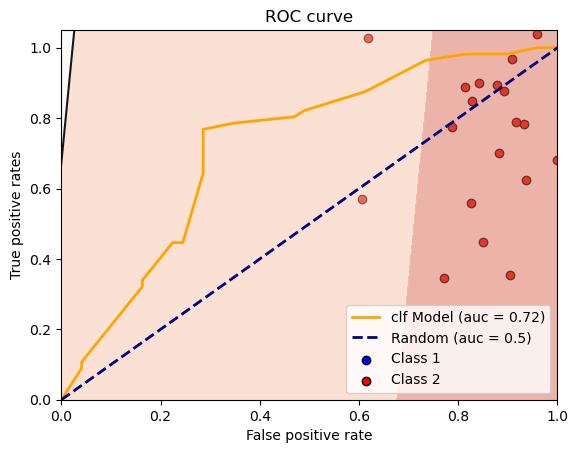

In [ ]:
import matplotlib.pyplot as plt

plt.plot(fpr, tpr, color='orange', lw=2, label='clf Model (auc = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random (auc = 0.5)')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False positive rate')
plt.ylabel('True positive rates')
plt.title('ROC curve')
plt.legend(loc="lower right")
plt.show();
